# Imports

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
import seaborn as sns

In [0]:
sns.set()

# Plotting sigmoid function

$S_{w,b}(x) = \frac{1}{1+e^{-(wx+b)}}$

In [0]:
def sigmoid(X,w,b):

  return 1/(1+np.exp(-((w*X)+b)))

In [5]:
sigmoid(1,0.5,0)

0.6224593312018546

In [0]:
w = -0.5 #@param{type:"slider", min:-2,max:2,step:0.1}
b = 0.1 #@param{type:"slider", min:-2,max:2,step:0.1}
X = np.linspace(-10,10,100)
Y = sigmoid(X,w,b)

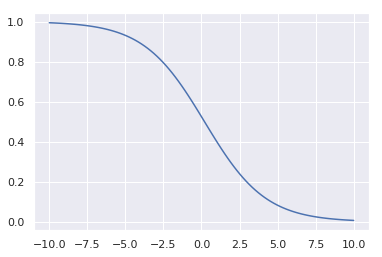

In [7]:
plt.plot(X,Y)
plt.show()

# Plotting 3d Sigmoid


In [0]:
from mpl_toolkits import mplot3d

In [0]:
x1 = np.linspace(-10,10,100)
x2 = np.linspace(-10,10,50)

xx1, xx2 = np.meshgrid(x1,x2)

In [0]:
np.meshgrid?

In [11]:
xx1.shape

(50, 100)

In [12]:
xx2.shape

(50, 100)

In [0]:
x1 = np.linspace(-10,10,100)
x2 = np.linspace(-10,10,100)

xx1, xx2 = np.meshgrid(x1,x2)

In [0]:
def sigmoid_2d(x1,x2,w1,w2,b):
  return 1/(1+np.exp(-(w1*x1+w2*x2+b)))

In [15]:
sigmoid_2d(1,0,0.5,0,0)

0.6224593312018546

In [0]:
w1 = 0.5
w2 = 0.5
b = 0

In [0]:
y = sigmoid_2d(xx1,xx2,w1,w2,b)

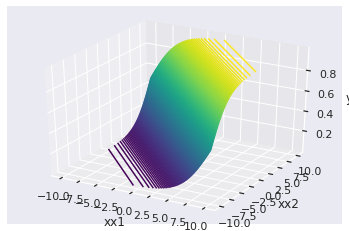

In [18]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(xx1, xx2, y, 200, cmap='viridis')
ax.set_xlabel('xx1')
ax.set_ylabel('xx2')
ax.set_zlabel('y');

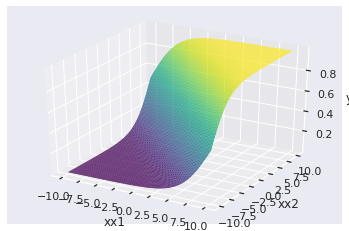

In [19]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(xx1, xx2, y, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
#ax.plot_surface(xx1, xx2, y,cmap='viridis')
ax.set_xlabel('xx1')
ax.set_ylabel('xx2')
ax.set_zlabel('y');

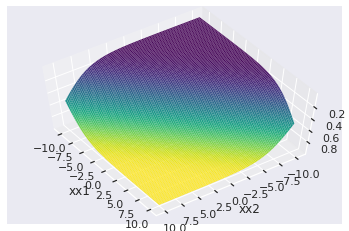

In [20]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(xx1, xx2, y, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
#ax.plot_surface(xx1, xx2, y,cmap='viridis')
ax.set_xlabel('xx1')
ax.set_ylabel('xx2')
ax.set_zlabel('y');

ax.view_init(300,35)

In [0]:
ax.view_init?

# Plotting Loss

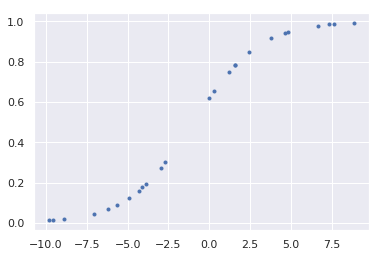

In [24]:
w_unknown = 0.5
b_unknown = 0.5

X = np.random.random(25)*20-10
Y = sigmoid(X,w_unknown, b_unknown)

plt.plot(X,Y,'.')
plt.show()

In [0]:
def calculate_loss(X,Y,w_est,b_est):
  loss = 0
  for x,y in zip(X,Y):
    loss += (y-sigmoid(x,w_est,b_est))**2
  return loss

In [0]:
w = np.linspace(0,2,100)
b = np.linspace(-1,1,100)

ww,bb = np.meshgrid(w,b)
loss = np.zeros(ww.shape)

In [0]:
for i in range(ww.shape[0]):
  for j in range(ww.shape[1]):
    loss[i,j] = calculate_loss(X,Y,ww[i,j],bb[i,j])

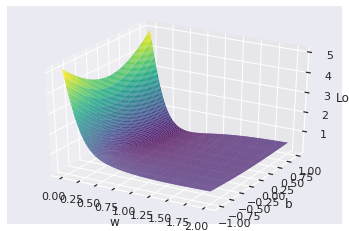

In [32]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(ww, bb, loss, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
#ax.plot_surface(xx1, xx2, y,cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss');

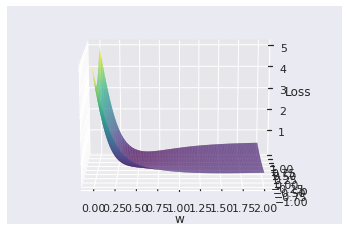

In [41]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(ww, bb, loss, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
#ax.plot_surface(xx1, xx2, y,cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')

ax.view_init(15,270)

In [46]:
ij = np.argmin(loss)
print(ij)

i = int(np.floor(ij/loss.shape[1]))
j = int(ij - i*loss.shape[1])

i,j

7425


(74, 25)

In [48]:
ww[i,j],bb[i,j]

(0.5050505050505051, 0.49494949494949503)